In [34]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import regularizers
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=UserWarning, message=r"Your `PyDataset` class should call `super().__init__\(\*\*kwargs\)`")

In [35]:
df = pd.read_csv("/kaggle/input/butterfly-image-classification/Training_set.csv")
df.head(5)

,filename,label
0,Image_1.jpg,SOUTHERN DOGFACE
1,Image_2.jpg,ADONIS
2,Image_3.jpg,BROWN SIPROETA
3,Image_4.jpg,MONARCH
4,Image_5.jpg,GREEN CELLED CATTLEHEART


In [44]:
df.label.unique()

array(['SOUTHERN DOGFACE', 'ADONIS', 'BROWN SIPROETA', 'MONARCH',
       'GREEN CELLED CATTLEHEART', 'CAIRNS BIRDWING',
       'EASTERN DAPPLE WHITE', 'RED POSTMAN', 'MANGROVE SKIPPER',
       'BLACK HAIRSTREAK', 'CABBAGE WHITE', 'RED ADMIRAL', 'PAINTED LADY',
       'PAPER KITE', 'SOOTYWING', 'PINE WHITE', 'PEACOCK',
       'CHECQUERED SKIPPER', 'JULIA', 'COMMON WOOD-NYMPH', 'BLUE MORPHO',
       'CLOUDED SULPHUR', 'STRAITED QUEEN', 'ORANGE OAKLEAF',
       'PURPLISH COPPER', 'ATALA', 'IPHICLUS SISTER', 'DANAID EGGFLY',
       'LARGE MARBLE', 'PIPEVINE SWALLOW', 'BLUE SPOTTED CROW',
       'RED CRACKER', 'QUESTION MARK', 'CRIMSON PATCH', 'BANDED PEACOCK',
       'SCARCE SWALLOW', 'COPPER TAIL', 'GREAT JAY', 'INDRA SWALLOW',
       'VICEROY', 'MALACHITE', 'APPOLLO', 'TWO BARRED FLASHER',
       'MOURNING CLOAK', 'TROPICAL LEAFWING', 'POPINJAY', 'ORANGE TIP',
       'GOLD BANDED', 'BECKERS WHITE', 'RED SPOTTED PURPLE',
       'MILBERTS TORTOISESHELL', 'SILVER SPOT SKIPPER', 'AMERICAN SN

In [36]:
len(df)

6499

In [37]:
df.isnull().sum()

filename    0
label       0
dtype: int64

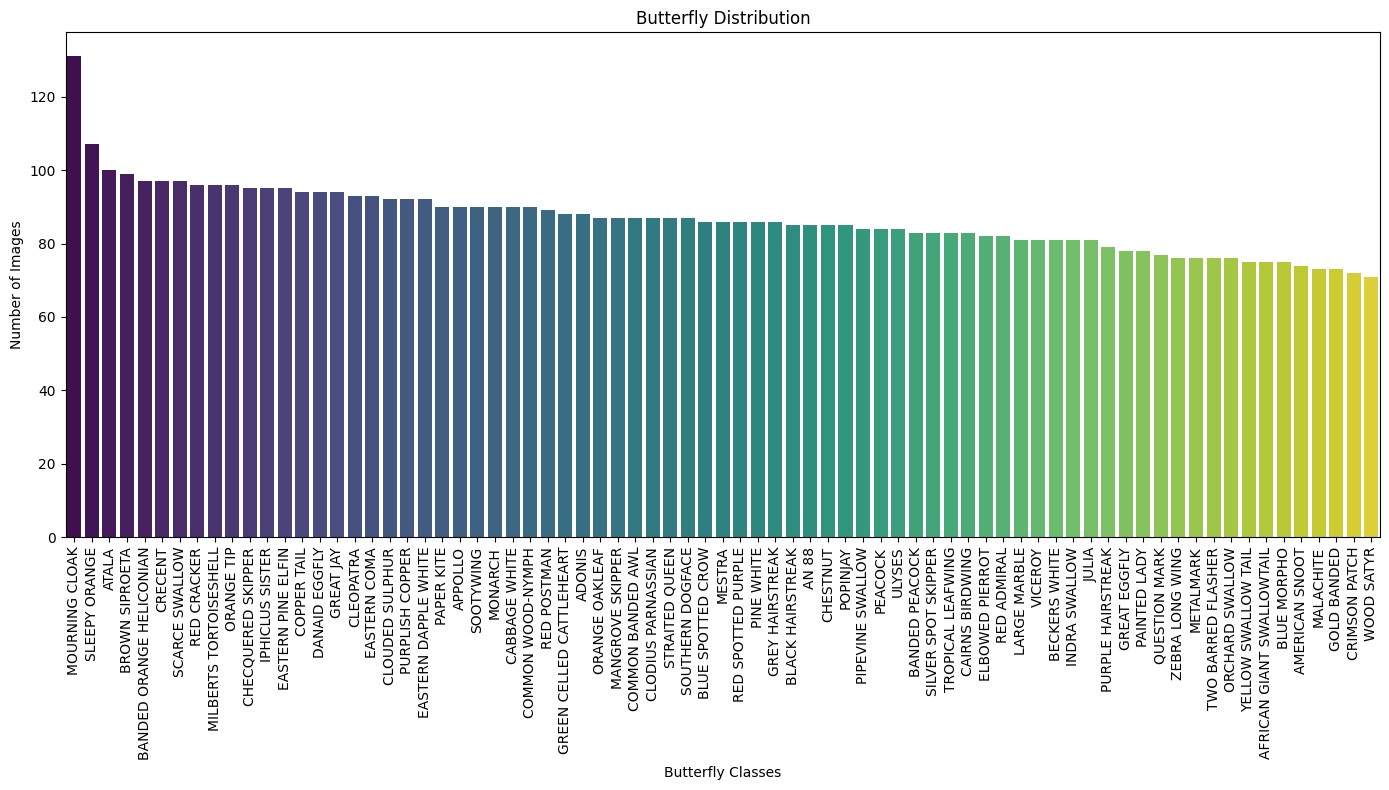

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

class_counts = df['label'].value_counts().sort_index()

class_counts = class_counts.sort_values(ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Butterfly Distribution')
plt.xlabel('Butterfly Classes')
plt.ylabel('Number of Images')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


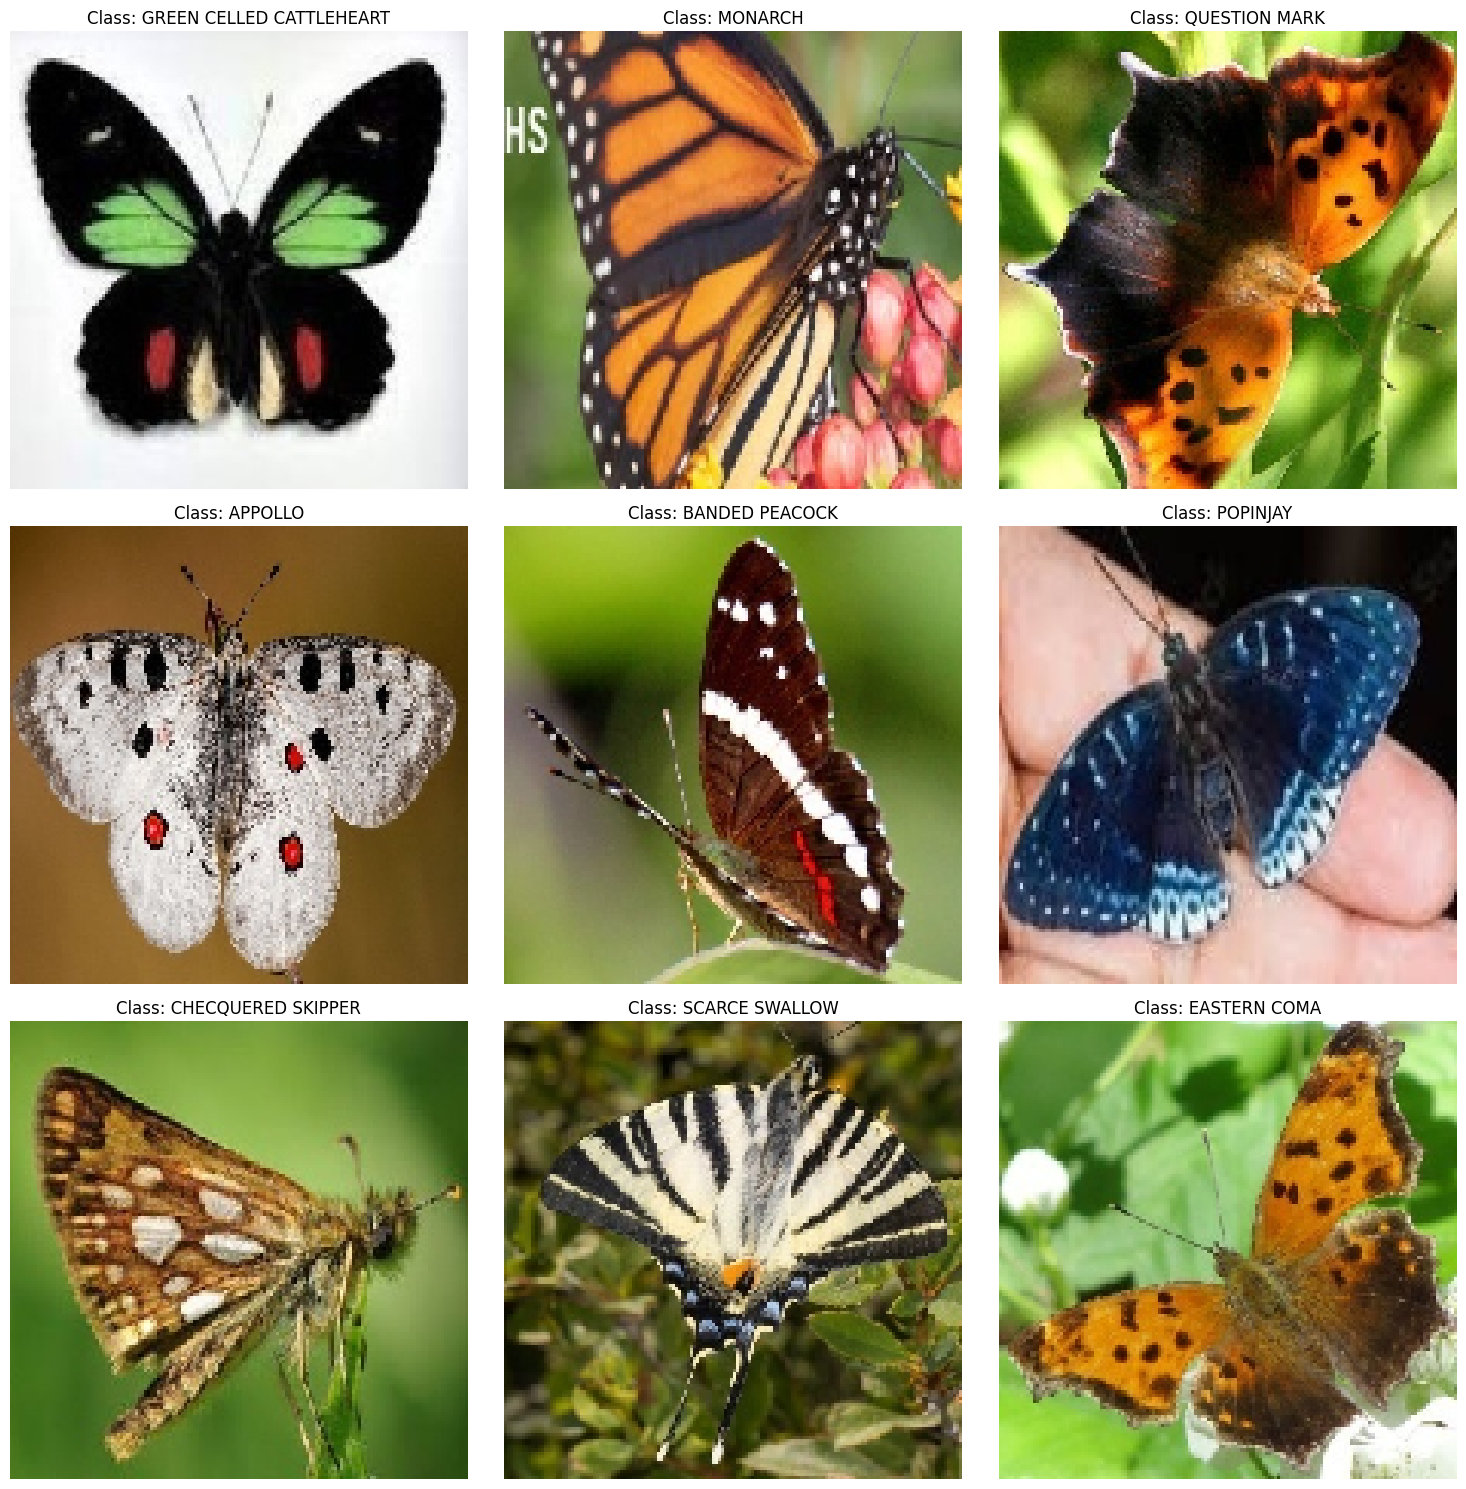

In [39]:
image_dir = "/kaggle/input/butterfly-image-classification/train"  # this is so important

sample_images = df.sample(9, random_state=42)


fig, axes = plt.subplots(3, 3, figsize=(15, 15))


for i, (index, row) in enumerate(sample_images.iterrows()):
    img_path = os.path.join(image_dir, row['filename'])
    img = load_img(img_path, target_size=(150, 150))
    img_array = img_to_array(img) / 255.0  # Normalize the image
    
    ax = axes[i // 3, i % 3]
    ax.imshow(img_array)
    ax.set_title(f"Class: {row['label']}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [40]:
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

image_dir = "/kaggle/input/butterfly-image-classification/train"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=image_dir,
    x_col='filename',
    y_col='label',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory=image_dir,
    x_col='filename',
    y_col='label',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 5199 validated image filenames belonging to 75 classes.
Found 1300 validated image filenames belonging to 75 classes.


In [42]:
history = model_CNN.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=49,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)

Epoch 1/49
162/162 ━━━━━━━━━━━━━━━━━━━━ 34s 204ms/step - accuracy: 0.7984 - loss: 0.6722 - val_accuracy: 0.7664 - val_loss: 0.9621
Epoch 2/49
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 126us/step - accuracy: 0.6875 - loss: 0.9587 - val_accuracy: 0.0500 - val_loss: 288.9728
Epoch 3/49
162/162 ━━━━━━━━━━━━━━━━━━━━ 35s 204ms/step - accuracy: 0.7733 - loss: 0.7309 - val_accuracy: 0.7906 - val_loss: 0.8820
Epoch 4/49
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 127us/step - accuracy: 0.8125 - loss: 0.9521 - val_accuracy: 0.0000e+00 - val_loss: 225.3248
Epoch 5/49
162/162 ━━━━━━━━━━━━━━━━━━━━ 34s 203ms/step - accuracy: 0.7849 - loss: 0.7186 - val_accuracy: 0.7852 - val_loss: 0.9514
Epoch 6/49
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 135us/step - accuracy: 0.8125 - loss: 0.5151 - val_accuracy: 0.0000e+00 - val_loss: 203.7447
Epoch 7/49
162/162 ━━━━━━━━━━━━━━━━━━━━ 35s 210ms/step - accuracy: 0.7960 - loss: 0.7019 - val_accuracy: 0.7930 - val_loss: 0.8949
Epoch 8/49
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 113us/step - accuracy: 0.7500

In [43]:
model_CNN.save('model_butter_new.h5')

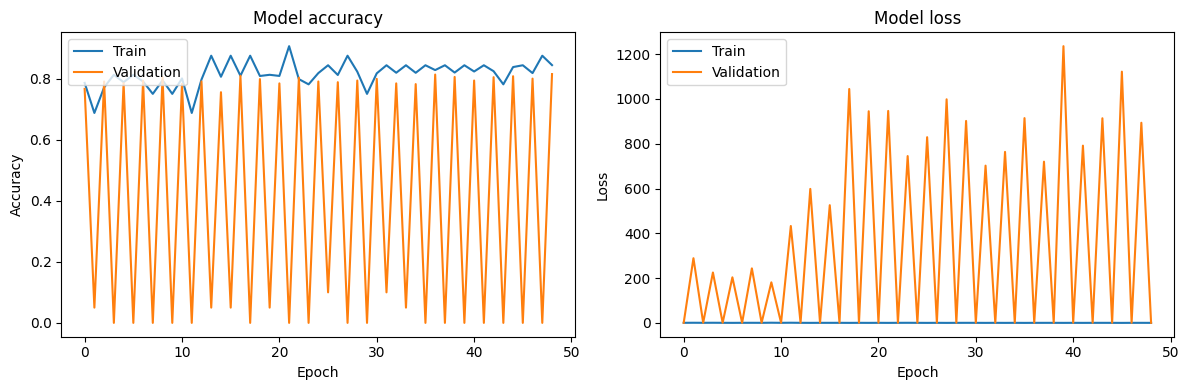

In [45]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

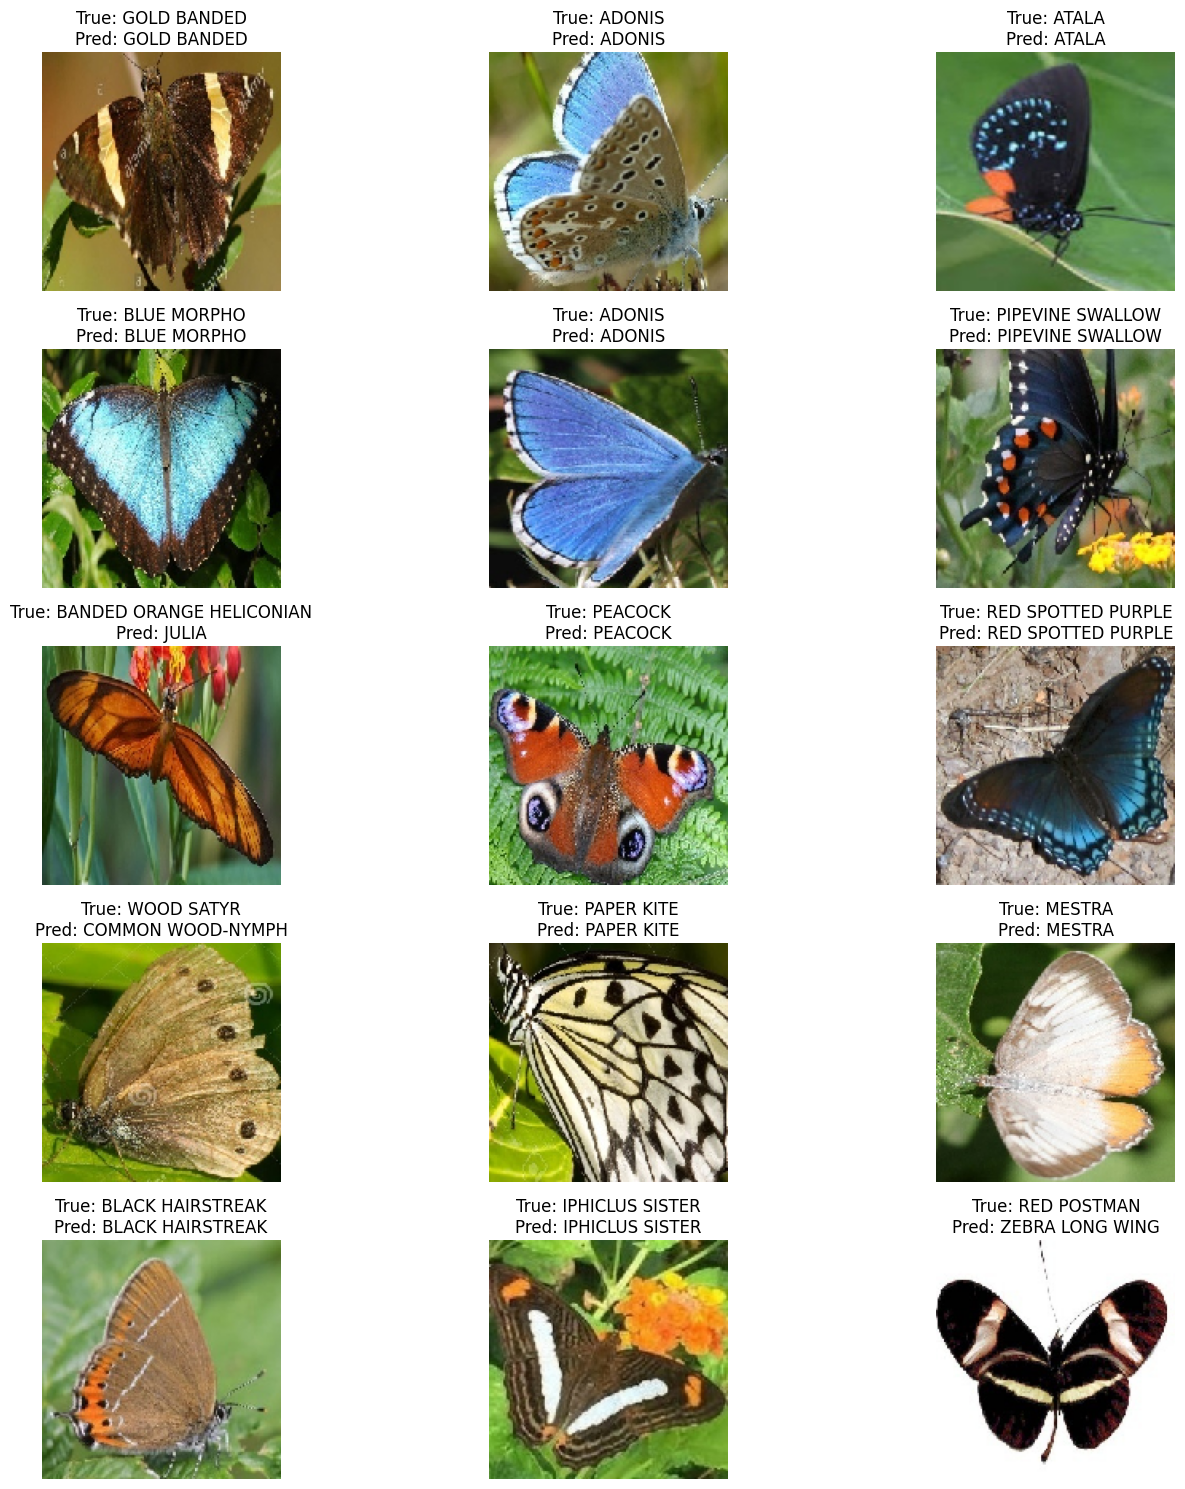

In [48]:
import matplotlib.pyplot as plt

val_images, val_labels = next(val_generator)

pred_labels = model_CNN.predict(val_images)
pred_labels = np.argmax(pred_labels, axis=1)
true_labels = np.argmax(val_labels, axis=1)

class_indices = val_generator.class_indices
class_names = {v: k for k, v in class_indices.items()}

display_images(val_images, true_labels, pred_labels, class_names, num_images=9)

# Assuming val_images, true_labels, pred_labels, and class_names are already defined
def display_images(images, true_labels, pred_labels, class_names, num_images=15):
    plt.figure(figsize=(15, 15))
    for i in range(num_images):
        plt.subplot(5, 3, i + 1)  # Adjusted for 15 images (5 rows, 3 columns)
        plt.imshow(images[i])
        true_label = class_names[int(true_labels[i])]
        pred_label = class_names[int(pred_labels[i])]
        plt.title(f"True: {true_label}\nPred: {pred_label}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Call the function to display the images
display_images(val_images, true_labels, pred_labels, class_names, num_images=15)